In [105]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use('PS') 
import matplotlib.pyplot as plt
import time
import datetime
import filterbyip as fbi
import Cdf
import Pmf

In [106]:
def print_percentiles(c, name):
    if c == 0:
        return null
    else:
        print('-----------------------------\n')
        print('percentile values distribution for %s\n' % name)

        print('20th Percentile:%f\n' % c.Percentile(20))    
        print('25th Percentile:%f\n' % c.Percentile(25))
        print('40th Percentile:%f\n' % c.Percentile(40))
        print('50th Percentile:%f\n' % c.Percentile(50))
        print('60th Percentile:%f\n' % c.Percentile(60))
        print('75th Percentile:%f\n' % c.Percentile(75))
        print('80th Percentile:%f\n' % c.Percentile(80))    
        print('90th Percentile:%f\n' % c.Percentile(90))
        print('99th Percentile:%f\n' % c.Percentile(99))

        print('-----------------------------\n')

In [107]:
def write_percentiles(filename, c):
	with open(filename, 'w') as f:
		f.write('values; percentile\n')
		for x, y in zip(c.xs, c.ps):
			f.write('%.2f, %.2f\n'%(x, y))

In [108]:
%autosave 20

Autosaving every 20 seconds


In [109]:
import warnings
warnings.filterwarnings('ignore')

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [110]:
# from IPython.core.display import HTML
# css = open('style-table.css').read() + open('style-notebook.css').read()
# HTML('<style>{}</style>'.format(css))

In [111]:
tcp_tls_data = "./AWS_results/Bahrain/data/output_curl_data.csv"
quic_data = "./AWS_results/Bahrain/data/output_quic.csv"

In [112]:
scol_names = ['TimeOfMeasurement', 'Url', 'Ip', 'Port', 'DnsLookupTime', 'TCPHandshakeTime', 'ConnectionEstablishmentTime', 'TTFB', 'TotalDownloadTime', 'HttpResponse', 'HTTPVersion', 'Protocol']
tcol_names = ['TimeOfMeasurement', 'Url', 'Path', 'Ip', 'Port', 'DNSTime', 'ConnectionEstablishmentTime', 'TTFB', 'TotalDownloadTime', 'HttpResponse', 'Protocol']

In [113]:
t = pd.read_csv(quic_data, ';', names=tcol_names, header=None)
s = pd.read_csv(tcp_tls_data, ';', names=scol_names, header=None)

In [114]:
t = t.dropna()
s = s.dropna()

In [115]:
#t = t[t['TimeOfMeasurement'] > 1581721201]
#s = s[s['TimeOfMeasurement'] > 1581721201]

In [116]:
s['TTFB']=s['TTFB']-s['DnsLookupTime']
s['TotalDownloadTime']=s['TotalDownloadTime']-s['DnsLookupTime']

In [117]:
s.count()

TimeOfMeasurement              1105059
Url                            1105059
Ip                             1105059
Port                           1105059
DnsLookupTime                  1105059
TCPHandshakeTime               1105059
ConnectionEstablishmentTime    1105059
TTFB                           1105059
TotalDownloadTime              1105059
HttpResponse                   1105059
HTTPVersion                    1105059
Protocol                       1105059
dtype: int64

In [118]:
s.head()

,TimeOfMeasurement,Url,Ip,Port,DnsLookupTime,TCPHandshakeTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,HTTPVersion,Protocol
0,1589652002,www.google.com,216.58.208.228,443,15.037,9.958,348.625,512.658,529.481,200,HTTP/1.1,TCP/TLS1.2
1,1589652003,www.google.com,216.58.208.228,443,9.155,9.634,287.186,458.372,479.867,200,HTTP2,TCP/TLS1.2
2,1589652004,facebook.com,31.13.92.36,443,124.701,121.924,481.286,622.836,622.860,301,HTTP/1.1,TCP/TLS1.2
3,1589652004,facebook.com,31.13.92.36,443,4.282,122.038,347.964,488.671,488.701,301,HTTP/1.1,TCP/TLS1.3
4,1589652005,facebook.com,31.13.92.36,443,28.492,122.091,445.536,586.505,586.530,301,HTTP2,TCP/TLS1.2


In [119]:
t.count()

TimeOfMeasurement              751301
Url                            751301
Path                           751301
Ip                             751301
Port                           751301
DNSTime                        751301
ConnectionEstablishmentTime    751301
TTFB                           751301
TotalDownloadTime              751301
HttpResponse                   751301
Protocol                       751301
dtype: int64

In [120]:
t.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol
0,1.589587e+09,www.0dayrox2.blogspot.com,/,216.58.207.1,443,443.620,241.357,517.799,788.130,404.0,Q043
1,1.589587e+09,www.0dayrox2.blogspot.com,/,216.58.207.1,443,0.516,243.061,503.185,775.395,404.0,Q046
2,1.589587e+09,www.0dayrox2.blogspot.com,/,216.58.207.1,443,3.661,236.985,497.940,766.237,404.0,Q050
8,1.589587e+09,www.0dayrox.blogspot.com,/,216.58.208.225,443,255.472,244.896,530.279,20.093,404.0,Q043
9,1.589587e+09,www.0dayrox.blogspot.com,/,216.58.208.225,443,0.489,242.906,699.822,971.926,404.0,Q046


In [121]:
def timestamp2human(timestamp):
    return datetime.datetime.fromtimestamp(int(timestamp)).strftime('%c')

In [122]:
s['TimeOfMeasurement'] = s['TimeOfMeasurement'].apply(timestamp2human)

In [123]:
s.head()

,TimeOfMeasurement,Url,Ip,Port,DnsLookupTime,TCPHandshakeTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,HTTPVersion,Protocol
0,Sat May 16 20:00:02 2020,www.google.com,216.58.208.228,443,15.037,9.958,348.625,512.658,529.481,200,HTTP/1.1,TCP/TLS1.2
1,Sat May 16 20:00:03 2020,www.google.com,216.58.208.228,443,9.155,9.634,287.186,458.372,479.867,200,HTTP2,TCP/TLS1.2
2,Sat May 16 20:00:04 2020,facebook.com,31.13.92.36,443,124.701,121.924,481.286,622.836,622.860,301,HTTP/1.1,TCP/TLS1.2
3,Sat May 16 20:00:04 2020,facebook.com,31.13.92.36,443,4.282,122.038,347.964,488.671,488.701,301,HTTP/1.1,TCP/TLS1.3
4,Sat May 16 20:00:05 2020,facebook.com,31.13.92.36,443,28.492,122.091,445.536,586.505,586.530,301,HTTP2,TCP/TLS1.2


In [124]:
s.tail()

,TimeOfMeasurement,Url,Ip,Port,DnsLookupTime,TCPHandshakeTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,HTTPVersion,Protocol
1105054,Wed May 20 18:07:24 2020,opendota.com,104.18.34.28,443,252.813,117.226,388.927,561.560,561.581,301,HTTP/1.1,TCP/TLS1.2
1105055,Wed May 20 18:07:24 2020,qollie.com,104.31.70.63,443,60.512,117.009,412.863,848.984,849.023,525,HTTP/1.1,TCP/TLS1.2
1105056,Wed May 20 18:07:24 2020,bourdela.com,104.22.63.139,443,4.147,117.210,394.354,550.442,550.466,301,HTTP2,TCP/TLS1.2
1105057,Wed May 20 18:07:24 2020,rivalo.com,104.24.203.9,443,60.475,105.930,358.883,594.855,594.883,302,HTTP/1.1,TCP/TLS1.2
1105058,Wed May 20 18:07:24 2020,opendota.com,104.18.34.28,443,4.159,116.348,387.686,536.343,536.375,301,HTTP2,TCP/TLS1.2


In [125]:
#t['TimeOfMeasurement'] = t['TimeOfMeasurement'].apply(timestamp2human)

In [126]:
t.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol
0,1.589587e+09,www.0dayrox2.blogspot.com,/,216.58.207.1,443,443.620,241.357,517.799,788.130,404.0,Q043
1,1.589587e+09,www.0dayrox2.blogspot.com,/,216.58.207.1,443,0.516,243.061,503.185,775.395,404.0,Q046
2,1.589587e+09,www.0dayrox2.blogspot.com,/,216.58.207.1,443,3.661,236.985,497.940,766.237,404.0,Q050
8,1.589587e+09,www.0dayrox.blogspot.com,/,216.58.208.225,443,255.472,244.896,530.279,20.093,404.0,Q043
9,1.589587e+09,www.0dayrox.blogspot.com,/,216.58.208.225,443,0.489,242.906,699.822,971.926,404.0,Q046


In [127]:
t.tail()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol
2128532,1.589991e+09,www.adictasalalectura2.blogspot.com,/,172.217.19.161,443,0.401,239.884,499.703,499.749,301.0,Q046
2128533,1.589991e+09,www.google.com.pt,/,172.217.21.35,443,0.449,235.149,245.256,245.306,404.0,Q050
2128539,1.589991e+09,www.adictasalalectura2.blogspot.com,/,216.58.208.225,443,146.867,238.475,505.550,505.614,301.0,Q050
2128545,1.589991e+09,www.google.com.py,/,216.58.207.99,443,157.220,236.237,402.310,402.435,200.0,Q043
2128546,1.589991e+09,www.partiturasmil.blogspot.com,/,172.217.19.161,443,125.523,237.241,655.446,655.511,301.0,Q046


In [128]:
def filter_by_ip(df, column):
  """reads a DataFrame, calls fbi.filter_v{4,6} to get DataFrames with rows
     containing only v4, v6 endpoints. Returns the two DataFrame as a tuple"""

  dfv6 = fbi.filter_v6(df, column)
  dfv4 = fbi.filter_v4(df, column)
  return dfv4, dfv6

In [129]:
#quic4, quic6 = filter_by_ip(t, column = 'Ip')
quic4 = t[t['Ip'].str.contains("\.")]
quic6 = t[t['Ip'].str.contains("\:")]

In [130]:
quic4.count()

TimeOfMeasurement              751301
Url                            751301
Path                           751301
Ip                             751301
Port                           751301
DNSTime                        751301
ConnectionEstablishmentTime    751301
TTFB                           751301
TotalDownloadTime              751301
HttpResponse                   751301
Protocol                       751301
dtype: int64

In [131]:
quic4.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol
0,1.589587e+09,www.0dayrox2.blogspot.com,/,216.58.207.1,443,443.620,241.357,517.799,788.130,404.0,Q043
1,1.589587e+09,www.0dayrox2.blogspot.com,/,216.58.207.1,443,0.516,243.061,503.185,775.395,404.0,Q046
2,1.589587e+09,www.0dayrox2.blogspot.com,/,216.58.207.1,443,3.661,236.985,497.940,766.237,404.0,Q050
8,1.589587e+09,www.0dayrox.blogspot.com,/,216.58.208.225,443,255.472,244.896,530.279,20.093,404.0,Q043
9,1.589587e+09,www.0dayrox.blogspot.com,/,216.58.208.225,443,0.489,242.906,699.822,971.926,404.0,Q046


In [132]:
quic6.count()

TimeOfMeasurement              0
Url                            0
Path                           0
Ip                             0
Port                           0
DNSTime                        0
ConnectionEstablishmentTime    0
TTFB                           0
TotalDownloadTime              0
HttpResponse                   0
Protocol                       0
dtype: int64

In [133]:
quic6.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol


In [134]:
#tcp4, tcp6 = filter_by_ip(s, column = 'Ip')
tcp4 = s[s['Ip'].str.contains("\.")]
tcp6 = s[s['Ip'].str.contains("\:")]

In [135]:
tcp4.count()

TimeOfMeasurement              1105059
Url                            1105059
Ip                             1105059
Port                           1105059
DnsLookupTime                  1105059
TCPHandshakeTime               1105059
ConnectionEstablishmentTime    1105059
TTFB                           1105059
TotalDownloadTime              1105059
HttpResponse                   1105059
HTTPVersion                    1105059
Protocol                       1105059
dtype: int64

In [136]:
tcp4.head()

,TimeOfMeasurement,Url,Ip,Port,DnsLookupTime,TCPHandshakeTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,HTTPVersion,Protocol
0,Sat May 16 20:00:02 2020,www.google.com,216.58.208.228,443,15.037,9.958,348.625,512.658,529.481,200,HTTP/1.1,TCP/TLS1.2
1,Sat May 16 20:00:03 2020,www.google.com,216.58.208.228,443,9.155,9.634,287.186,458.372,479.867,200,HTTP2,TCP/TLS1.2
2,Sat May 16 20:00:04 2020,facebook.com,31.13.92.36,443,124.701,121.924,481.286,622.836,622.860,301,HTTP/1.1,TCP/TLS1.2
3,Sat May 16 20:00:04 2020,facebook.com,31.13.92.36,443,4.282,122.038,347.964,488.671,488.701,301,HTTP/1.1,TCP/TLS1.3
4,Sat May 16 20:00:05 2020,facebook.com,31.13.92.36,443,28.492,122.091,445.536,586.505,586.530,301,HTTP2,TCP/TLS1.2


In [137]:
tcp6.count()

TimeOfMeasurement              0
Url                            0
Ip                             0
Port                           0
DnsLookupTime                  0
TCPHandshakeTime               0
ConnectionEstablishmentTime    0
TTFB                           0
TotalDownloadTime              0
HttpResponse                   0
HTTPVersion                    0
Protocol                       0
dtype: int64

In [138]:
tcp6.head()

,TimeOfMeasurement,Url,Ip,Port,DnsLookupTime,TCPHandshakeTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,HTTPVersion,Protocol


In [139]:
quic43 = quic4.loc[t['Protocol'] == 'Q043']
quic46 = quic4.loc[t['Protocol'] == 'Q046']
quic50 = quic4.loc[t['Protocol'] == 'Q050']
quicID24 = quic4.loc[t['Protocol'] == 'FF000018']
quic98 = quic4.loc[t['Protocol'] == '']

In [140]:
quic43.count()

TimeOfMeasurement              251957
Url                            251957
Path                           251957
Ip                             251957
Port                           251957
DNSTime                        251957
ConnectionEstablishmentTime    251957
TTFB                           251957
TotalDownloadTime              251957
HttpResponse                   251957
Protocol                       251957
dtype: int64

In [141]:
quic43.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol
0,1.589587e+09,www.0dayrox2.blogspot.com,/,216.58.207.1,443,443.620,241.357,517.799,788.130,404.0,Q043
8,1.589587e+09,www.0dayrox.blogspot.com,/,216.58.208.225,443,255.472,244.896,530.279,20.093,404.0,Q043
16,1.589587e+09,www.100leccionesdeguitarra.blogspot.com,/,172.217.19.161,443,119.798,243.659,648.941,649.004,301.0,Q043
24,1.589587e+09,www.100negocios.com,/,66.198.240.11,443,131.700,442.924,146.515,660.393,200.0,Q043
40,1.589587e+09,www.1100021.blogspot.com,/,172.217.19.161,443,134.146,246.937,736.288,737.330,301.0,Q043


In [142]:
quic43.tail()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol
2128520,1.589991e+09,www.google.com.pr,/,172.217.21.35,443,123.981,239.955,404.749,405.139,200.0,Q043
2128528,1.589991e+09,www.partiturasmil.blogspot.com,/,172.217.19.161,443,131.836,238.098,664.826,664.870,301.0,Q043
2128529,1.589991e+09,www.adictasalalectura2.blogspot.com,/,172.217.19.161,443,125.539,240.835,642.690,642.744,301.0,Q043
2128530,1.589991e+09,www.google.com.pt,/,172.217.21.35,443,239.877,236.930,247.121,247.164,404.0,Q043
2128545,1.589991e+09,www.google.com.py,/,216.58.207.99,443,157.220,236.237,402.310,402.435,200.0,Q043


In [143]:
quic46.count()

TimeOfMeasurement              249269
Url                            249269
Path                           249269
Ip                             249269
Port                           249269
DNSTime                        249269
ConnectionEstablishmentTime    249269
TTFB                           249269
TotalDownloadTime              249269
HttpResponse                   249269
Protocol                       249269
dtype: int64

In [144]:
quic46.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol
1,1.589587e+09,www.0dayrox2.blogspot.com,/,216.58.207.1,443,0.516,243.061,503.185,775.395,404.0,Q046
9,1.589587e+09,www.0dayrox.blogspot.com,/,216.58.208.225,443,0.489,242.906,699.822,971.926,404.0,Q046
17,1.589587e+09,www.100leccionesdeguitarra.blogspot.com,/,172.217.19.161,443,1.598,238.152,673.294,674.620,301.0,Q046
25,1.589587e+09,www.100negocios.com,/,66.198.240.11,443,0.472,444.456,114.160,632.938,200.0,Q046
41,1.589587e+09,www.1100021.blogspot.com,/,172.217.19.161,443,1.173,244.879,709.068,709.117,301.0,Q046


In [145]:
quic46.tail()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol
2128506,1.589991e+09,www.adicahyadi019.blogspot.com,/,172.217.19.161,443,0.498,241.242,474.378,474.432,301.0,Q046
2128521,1.589991e+09,www.google.com.pr,/,172.217.21.35,443,0.488,237.978,395.546,395.888,200.0,Q046
2128531,1.589991e+09,www.google.com.pt,/,172.217.21.35,443,0.402,231.378,241.661,241.702,404.0,Q046
2128532,1.589991e+09,www.adictasalalectura2.blogspot.com,/,172.217.19.161,443,0.401,239.884,499.703,499.749,301.0,Q046
2128546,1.589991e+09,www.partiturasmil.blogspot.com,/,172.217.19.161,443,125.523,237.241,655.446,655.511,301.0,Q046


In [146]:
quic50.count()

TimeOfMeasurement              246511
Url                            246511
Path                           246511
Ip                             246511
Port                           246511
DNSTime                        246511
ConnectionEstablishmentTime    246511
TTFB                           246511
TotalDownloadTime              246511
HttpResponse                   246511
Protocol                       246511
dtype: int64

In [147]:
quic50.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol
2,1.589587e+09,www.0dayrox2.blogspot.com,/,216.58.207.1,443,3.661,236.985,497.940,766.237,404.0,Q050
10,1.589587e+09,www.0dayrox.blogspot.com,/,216.58.208.225,443,0.416,241.586,544.358,783.011,404.0,Q050
18,1.589587e+09,www.100leccionesdeguitarra.blogspot.com,/,172.217.19.161,443,0.551,238.700,630.761,630.822,301.0,Q050
26,1.589587e+09,www.100negocios.com,/,66.198.240.11,443,1.245,443.276,145.352,678.986,200.0,Q050
42,1.589587e+09,www.1100021.blogspot.com,/,172.217.19.161,443,0.413,239.616,704.431,704.478,301.0,Q050


In [148]:
quic50.tail()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol
2128508,1.589991e+09,www.google.com.pk,/,216.58.207.99,443,0.404,236.901,420.352,420.671,200.0,Q050
2128514,1.589991e+09,www.adicahyadi019.blogspot.com,/,172.217.19.161,443,0.418,239.734,477.493,477.563,301.0,Q050
2128522,1.589991e+09,www.google.com.pr,/,172.217.21.35,443,0.450,241.267,400.942,401.052,200.0,Q050
2128533,1.589991e+09,www.google.com.pt,/,172.217.21.35,443,0.449,235.149,245.256,245.306,404.0,Q050
2128539,1.589991e+09,www.adictasalalectura2.blogspot.com,/,216.58.208.225,443,146.867,238.475,505.550,505.614,301.0,Q050


In [149]:
quicID24.count()

TimeOfMeasurement              3564
Url                            3564
Path                           3564
Ip                             3564
Port                           3564
DNSTime                        3564
ConnectionEstablishmentTime    3564
TTFB                           3564
TotalDownloadTime              3564
HttpResponse                   3564
Protocol                       3564
dtype: int64

In [150]:
quicID24.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol
555,1.589588e+09,www.9999999views.com,/,178.32.108.178,443,0.473,131.206,260.649,260.704,301.0,FF000018
1251,1.589588e+09,www.akaian.com,/,150.95.55.38,443,0.433,425.445,698.605,698.658,301.0,FF000018
1519,1.589588e+09,www.allzine.org,/,194.150.248.139,443,0.381,133.933,279.537,279.590,200.0,FF000018
1599,1.589588e+09,www.altoonaworks.info,/,72.249.49.192,443,0.406,389.971,629.629,634.911,200.0,FF000018
3131,1.589589e+09,www.av-baron.com,/,150.95.52.123,443,107.104,310.662,568.116,568.172,301.0,FF000018


In [151]:
quicID24.tail()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol
2123701,1.589990e+09,www.xn--juhlapyht-22a.fi,/,185.179.116.91,443,24.087,152.567,302.785,480.618,200.0,FF000018
2123847,1.589990e+09,www.xpeedstudio.com,/,158.106.138.24,443,15.365,367.581,791.865,791.951,301.0,FF000018
2124434,1.589990e+09,www.oakleys.org.uk,/,192.138.189.160,443,0.421,337.787,687.214,979.001,200.0,FF000018
2125333,1.589990e+09,www.okt-trailer.com,/,77.223.141.189,443,0.422,328.521,557.729,767.517,200.0,FF000018
2125577,1.589991e+09,www.girlspic.net,/,93.123.73.198,443,0.344,161.431,405.025,562.599,200.0,FF000018


In [152]:
quic43_6 = quic6.loc[t['Protocol'] == 'Q043']
quic46_6 = quic6.loc[t['Protocol'] == 'Q046']
quic50_6 = quic6.loc[t['Protocol'] == 'Q050']
#quic98_6 = quic6.loc[t['Protocol'] == '']
quicID24_6 = quic6.loc[t['Protocol'] == 'FF000018'] 

In [153]:
quic43_6.count()

TimeOfMeasurement              0
Url                            0
Path                           0
Ip                             0
Port                           0
DNSTime                        0
ConnectionEstablishmentTime    0
TTFB                           0
TotalDownloadTime              0
HttpResponse                   0
Protocol                       0
dtype: int64

In [154]:
quic43_6.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol


In [155]:
quic43_6.tail()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol


In [156]:
quic46_6.count()

TimeOfMeasurement              0
Url                            0
Path                           0
Ip                             0
Port                           0
DNSTime                        0
ConnectionEstablishmentTime    0
TTFB                           0
TotalDownloadTime              0
HttpResponse                   0
Protocol                       0
dtype: int64

In [157]:
quic46_6.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol


In [158]:
quic46_6.tail()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol


In [159]:
quic50_6.count()

TimeOfMeasurement              0
Url                            0
Path                           0
Ip                             0
Port                           0
DNSTime                        0
ConnectionEstablishmentTime    0
TTFB                           0
TotalDownloadTime              0
HttpResponse                   0
Protocol                       0
dtype: int64

In [160]:
quic50_6.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol


In [161]:
quic50_6.tail()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol


In [162]:
quicID24_6.count()

TimeOfMeasurement              0
Url                            0
Path                           0
Ip                             0
Port                           0
DNSTime                        0
ConnectionEstablishmentTime    0
TTFB                           0
TotalDownloadTime              0
HttpResponse                   0
Protocol                       0
dtype: int64

In [163]:
quicID24_6.head()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol


In [164]:
quicID24_6.tail()

,TimeOfMeasurement,Url,Path,Ip,Port,DNSTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,Protocol


In [165]:
tcp12 = tcp4.loc[s['Protocol'] == 'TCP/TLS1.2']
tcp13 = tcp4.loc[s['Protocol'] == 'TCP/TLS1.3']

In [166]:
tcp12.count()

TimeOfMeasurement              1103523
Url                            1103523
Ip                             1103523
Port                           1103523
DnsLookupTime                  1103523
TCPHandshakeTime               1103523
ConnectionEstablishmentTime    1103523
TTFB                           1103523
TotalDownloadTime              1103523
HttpResponse                   1103523
HTTPVersion                    1103523
Protocol                       1103523
dtype: int64

In [167]:
tcp12.head()

,TimeOfMeasurement,Url,Ip,Port,DnsLookupTime,TCPHandshakeTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,HTTPVersion,Protocol
0,Sat May 16 20:00:02 2020,www.google.com,216.58.208.228,443,15.037,9.958,348.625,512.658,529.481,200,HTTP/1.1,TCP/TLS1.2
1,Sat May 16 20:00:03 2020,www.google.com,216.58.208.228,443,9.155,9.634,287.186,458.372,479.867,200,HTTP2,TCP/TLS1.2
2,Sat May 16 20:00:04 2020,facebook.com,31.13.92.36,443,124.701,121.924,481.286,622.836,622.860,301,HTTP/1.1,TCP/TLS1.2
4,Sat May 16 20:00:05 2020,facebook.com,31.13.92.36,443,28.492,122.091,445.536,586.505,586.530,301,HTTP2,TCP/TLS1.2
6,Sat May 16 20:00:06 2020,instagram.com,3.224.37.102,443,4.156,193.911,675.106,916.895,916.934,301,HTTP/1.1,TCP/TLS1.2


In [168]:
tcp12.tail()

,TimeOfMeasurement,Url,Ip,Port,DnsLookupTime,TCPHandshakeTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,HTTPVersion,Protocol
1105054,Wed May 20 18:07:24 2020,opendota.com,104.18.34.28,443,252.813,117.226,388.927,561.560,561.581,301,HTTP/1.1,TCP/TLS1.2
1105055,Wed May 20 18:07:24 2020,qollie.com,104.31.70.63,443,60.512,117.009,412.863,848.984,849.023,525,HTTP/1.1,TCP/TLS1.2
1105056,Wed May 20 18:07:24 2020,bourdela.com,104.22.63.139,443,4.147,117.210,394.354,550.442,550.466,301,HTTP2,TCP/TLS1.2
1105057,Wed May 20 18:07:24 2020,rivalo.com,104.24.203.9,443,60.475,105.930,358.883,594.855,594.883,302,HTTP/1.1,TCP/TLS1.2
1105058,Wed May 20 18:07:24 2020,opendota.com,104.18.34.28,443,4.159,116.348,387.686,536.343,536.375,301,HTTP2,TCP/TLS1.2


In [169]:
tcp13.count()

TimeOfMeasurement              1536
Url                            1536
Ip                             1536
Port                           1536
DnsLookupTime                  1536
TCPHandshakeTime               1536
ConnectionEstablishmentTime    1536
TTFB                           1536
TotalDownloadTime              1536
HttpResponse                   1536
HTTPVersion                    1536
Protocol                       1536
dtype: int64

In [170]:
tcp13.head()

,TimeOfMeasurement,Url,Ip,Port,DnsLookupTime,TCPHandshakeTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,HTTPVersion,Protocol
3,Sat May 16 20:00:04 2020,facebook.com,31.13.92.36,443,4.282,122.038,347.964,488.671,488.701,301,HTTP/1.1,TCP/TLS1.3
5,Sat May 16 20:00:05 2020,facebook.com,31.13.92.36,443,28.378,121.984,295.688,438.630,438.656,301,HTTP2,TCP/TLS1.3
7,Sat May 16 20:00:07 2020,instagram.com,34.236.163.22,443,124.564,194.890,454.912,716.552,716.592,301,HTTP/1.1,TCP/TLS1.3
9,Sat May 16 20:00:09 2020,instagram.com,52.1.109.248,443,4.166,193.880,456.653,706.758,706.786,301,HTTP2,TCP/TLS1.3
11,Sat May 16 20:00:10 2020,www.whatsapp.com,157.240.1.53,443,4.310,122.964,310.186,457.526,457.547,302,HTTP/1.1,TCP/TLS1.3


In [171]:
tcp13.tail()

,TimeOfMeasurement,Url,Ip,Port,DnsLookupTime,TCPHandshakeTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,HTTPVersion,Protocol
1103283,Wed May 20 18:00:22 2020,fbcdn.net,31.13.92.36,443,4.145,121.882,280.786,422.505,422.533,302,HTTP2,TCP/TLS1.3
1103388,Wed May 20 18:00:38 2020,messenger.com,157.240.1.18,443,4.141,122.493,287.095,459.321,459.346,301,HTTP/1.1,TCP/TLS1.3
1103393,Wed May 20 18:00:39 2020,messenger.com,157.240.1.18,443,4.142,122.647,281.849,452.233,452.257,301,HTTP2,TCP/TLS1.3
1104788,Wed May 20 18:06:05 2020,fb.com,157.240.1.35,443,28.477,122.492,282.414,427.374,427.399,302,HTTP/1.1,TCP/TLS1.3
1104793,Wed May 20 18:06:06 2020,fb.com,157.240.1.35,443,17.133,122.259,283.418,459.233,459.257,302,HTTP2,TCP/TLS1.3


In [172]:
tcp12_6 = tcp6.loc[s['Protocol'] == 'TCP/TLS1.2']
tcp13_6 = tcp6.loc[s['Protocol'] == 'TCP/TLS1.3']

In [173]:
tcp12_6.count()

TimeOfMeasurement              0
Url                            0
Ip                             0
Port                           0
DnsLookupTime                  0
TCPHandshakeTime               0
ConnectionEstablishmentTime    0
TTFB                           0
TotalDownloadTime              0
HttpResponse                   0
HTTPVersion                    0
Protocol                       0
dtype: int64

In [174]:
tcp12_6.head()

,TimeOfMeasurement,Url,Ip,Port,DnsLookupTime,TCPHandshakeTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,HTTPVersion,Protocol


In [175]:
tcp12_6.tail()

,TimeOfMeasurement,Url,Ip,Port,DnsLookupTime,TCPHandshakeTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,HTTPVersion,Protocol


In [176]:
tcp13_6.count()

TimeOfMeasurement              0
Url                            0
Ip                             0
Port                           0
DnsLookupTime                  0
TCPHandshakeTime               0
ConnectionEstablishmentTime    0
TTFB                           0
TotalDownloadTime              0
HttpResponse                   0
HTTPVersion                    0
Protocol                       0
dtype: int64

In [177]:
tcp13_6.head()

,TimeOfMeasurement,Url,Ip,Port,DnsLookupTime,TCPHandshakeTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,HTTPVersion,Protocol


In [178]:
tcp13_6.tail()

,TimeOfMeasurement,Url,Ip,Port,DnsLookupTime,TCPHandshakeTime,ConnectionEstablishmentTime,TTFB,TotalDownloadTime,HttpResponse,HTTPVersion,Protocol


In [179]:
x = Cdf.MakeCdfFromList(quic43['ConnectionEstablishmentTime'].values)
x1 =Cdf.MakeCdfFromList(quic50['ConnectionEstablishmentTime'].values)
x3 = Cdf.MakeCdfFromList(quic46['ConnectionEstablishmentTime'].values)
#x5 = Cdf.MakeCdfFromList(quic98['ConnectionEstablishmentTime'].values)
x6 = Cdf.MakeCdfFromList(quicID24['ConnectionEstablishmentTime'].values)
x4 = Cdf.MakeCdfFromList(tcp13['ConnectionEstablishmentTime'].values)
x2 =Cdf.MakeCdfFromList(tcp12['ConnectionEstablishmentTime'].values)

In [180]:
print_percentiles(x1, 'Q050')
print_percentiles(x2, 'tcp12')
print_percentiles(x3, 'Q046')
print_percentiles(x4, 'tcp13')
#print_percentiles(x5, 'Q098')
print_percentiles(x6, 'IETF h3-24')
print_percentiles(x, 'Q043')

-----------------------------

percentile values distribution for Q050

20th Percentile:235.338000

25th Percentile:236.073000

40th Percentile:238.171000

50th Percentile:239.030000

60th Percentile:240.541000

75th Percentile:242.895000

80th Percentile:243.958000

90th Percentile:317.629000

99th Percentile:555.652000

-----------------------------

-----------------------------

percentile values distribution for tcp12

20th Percentile:390.988000

25th Percentile:391.748000

40th Percentile:393.869000

50th Percentile:395.553000

60th Percentile:397.839000

75th Percentile:403.338000

80th Percentile:406.482000

90th Percentile:434.789000

99th Percentile:926.760000

-----------------------------

-----------------------------

percentile values distribution for Q046

20th Percentile:235.277000

25th Percentile:236.021000

40th Percentile:238.123000

50th Percentile:239.023000

60th Percentile:240.520000

75th Percentile:242.993000

80th Percentile:244.090000

90th Percentile:324.3

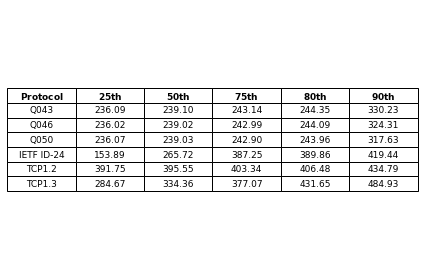

In [181]:
data = {'$\\bf{Protocol}$': ['Q043', 'Q046', 'Q050', 'IETF ID-24', 'TCP1.2', 'TCP1.3'],
	'$\\bf{25th}$': ["{:.2f}".format(x.Percentile(25)), "{:.2f}".format(x3.Percentile(25)), "{:.2f}".format(x1.Percentile(25)), "{:.2f}".format(x6.Percentile(25)), "{:.2f}".format(x2.Percentile(25)), "{:.2f}".format(x4.Percentile(25))],
	'$\\bf{50th}$': ["{:.2f}".format(x.Percentile(50)), "{:.2f}".format(x3.Percentile(50)), "{:.2f}".format(x1.Percentile(50)), "{:.2f}".format(x6.Percentile(50)), "{:.2f}".format(x2.Percentile(50)), "{:.2f}".format(x4.Percentile(50))],
	'$\\bf{75th}$': ["{:.2f}".format(x.Percentile(75)), "{:.2f}".format(x3.Percentile(75)), "{:.2f}".format(x1.Percentile(75)), "{:.2f}".format(x6.Percentile(75)), "{:.2f}".format(x2.Percentile(75)), "{:.2f}".format(x4.Percentile(75))],
	'$\\bf{80th}$': ["{:.2f}".format(x.Percentile(80)), "{:.2f}".format(x3.Percentile(80)), "{:.2f}".format(x1.Percentile(80)), "{:.2f}".format(x6.Percentile(80)), "{:.2f}".format(x2.Percentile(80)), "{:.2f}".format(x4.Percentile(80))],
    '$\\bf{90th}$': ["{:.2f}".format(x.Percentile(90)), "{:.2f}".format(x3.Percentile(90)), "{:.2f}".format(x1.Percentile(90)), "{:.2f}".format(x6.Percentile(90)), "{:.2f}".format(x2.Percentile(90)), "{:.2f}".format(x4.Percentile(90))]
        }    

df_percentile = pd.DataFrame(data)

fig, ax = plt.subplots()

# hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

ax.table(cellText=df_percentile.values, colLabels=df_percentile.columns, loc='center', cellLoc='center')

fig.tight_layout()
plt.savefig('./AWS/Bahrain/handshake_times_ipv4_percentile.png', format='png', bbox_inches='tight')

# plt.show()

In [182]:
write_percentiles('Q050.csv', x1)
write_percentiles('tcp12.csv', x2)
write_percentiles('Q046.csv', x3)
write_percentiles('tcp13.csv', x4)
#write_percentiles('Q098.csv', x5)
write_percentiles('IETFh3-24', x6)
write_percentiles('Q043.csv', x)

findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans.


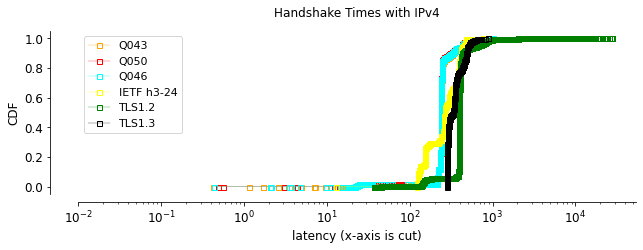

In [183]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q050
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q046
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'cyan')
#Q098
#plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')
#IETF h3-24
plt.plot(x6.xs, x6.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color='yellow')
#TLS1.2
plt.plot(x2.xs, x2.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#TLS1.3
plt.plot(x4.xs, x4.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'black')


ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
#ax.set_ylim([0,1.05])
ax.set_xlim([0.01, 54000])
ax.set_xscale('log')
ax.set_xlabel('latency (x-axis is cut)', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q050', 'Q046', 'IETF h3-24', 'TLS1.2', 'TLS1.3'], fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
##ax3.set_ylabel('[\'16th May - \'20thMay')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('Handshake Times with IPv4', fontsize=12, y=1.05)
plt.savefig('./AWS/Bahrain/handshake_times_ipv4.png', format='png', bbox_inches='tight')


In [184]:
#IPv4 and IPv6 comparison

In [185]:
x = Cdf.MakeCdfFromList(quic43['TTFB'].values)
x1 =Cdf.MakeCdfFromList(quic50['TTFB'].values)
x3 = Cdf.MakeCdfFromList(quic46['TTFB'].values)
#x5 = Cdf.MakeCdfFromList(quic98['TTFB'].values)
x6 = Cdf.MakeCdfFromList(quicID24['TTFB'].values)
x4 = Cdf.MakeCdfFromList(tcp13['TTFB'].values)
x2 =Cdf.MakeCdfFromList(tcp12['TTFB'].values)

In [186]:
write_percentiles('Q050.csv', x1)
write_percentiles('tcp12.csv', x2)
write_percentiles('Q046.csv', x3)
write_percentiles('tcp13.csv', x4)
#write_percentiles('Q098.csv', x5)
write_percentiles('IETFh3-24.csv', x6)
write_percentiles('Q043.csv', x)

In [187]:
print_percentiles(x1, 'Q050')
print_percentiles(x2, 'tcp12')
print_percentiles(x3, 'Q046')
print_percentiles(x4, 'tcp13')
#print_percentiles(x5, 'Q098')
print_percentiles(x6, 'IETFh3-24')
print_percentiles(x, 'Q043')

-----------------------------

percentile values distribution for Q050

20th Percentile:375.897000

25th Percentile:403.229000

40th Percentile:489.012000

50th Percentile:503.665000

60th Percentile:520.177000

75th Percentile:570.121000

80th Percentile:624.687000

90th Percentile:723.026000

99th Percentile:892.885000

-----------------------------

-----------------------------

percentile values distribution for tcp12

20th Percentile:531.996000

25th Percentile:543.543000

40th Percentile:602.043000

50th Percentile:656.916000

60th Percentile:739.971000

75th Percentile:938.162000

80th Percentile:1030.946000

90th Percentile:1267.054000

99th Percentile:2997.643000

-----------------------------

-----------------------------

percentile values distribution for Q046

20th Percentile:376.300000

25th Percentile:403.284000

40th Percentile:488.855000

50th Percentile:503.517000

60th Percentile:520.307000

75th Percentile:570.610000

80th Percentile:625.728000

90th Percentile:72

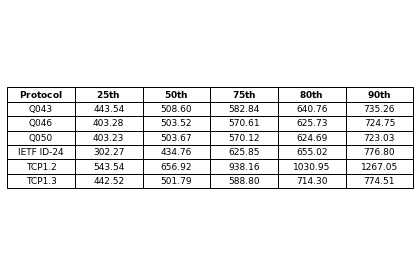

In [188]:
data = {'$\\bf{Protocol}$': ['Q043', 'Q046', 'Q050', 'IETF ID-24', 'TCP1.2', 'TCP1.3'],
	'$\\bf{25th}$': ["{:.2f}".format(x.Percentile(25)), "{:.2f}".format(x3.Percentile(25)), "{:.2f}".format(x1.Percentile(25)), "{:.2f}".format(x6.Percentile(25)), "{:.2f}".format(x2.Percentile(25)), "{:.2f}".format(x4.Percentile(25))],
	'$\\bf{50th}$': ["{:.2f}".format(x.Percentile(50)), "{:.2f}".format(x3.Percentile(50)), "{:.2f}".format(x1.Percentile(50)), "{:.2f}".format(x6.Percentile(50)), "{:.2f}".format(x2.Percentile(50)), "{:.2f}".format(x4.Percentile(50))],
	'$\\bf{75th}$': ["{:.2f}".format(x.Percentile(75)), "{:.2f}".format(x3.Percentile(75)), "{:.2f}".format(x1.Percentile(75)), "{:.2f}".format(x6.Percentile(75)), "{:.2f}".format(x2.Percentile(75)), "{:.2f}".format(x4.Percentile(75))],
	'$\\bf{80th}$': ["{:.2f}".format(x.Percentile(80)), "{:.2f}".format(x3.Percentile(80)), "{:.2f}".format(x1.Percentile(80)), "{:.2f}".format(x6.Percentile(80)), "{:.2f}".format(x2.Percentile(80)), "{:.2f}".format(x4.Percentile(80))],
    '$\\bf{90th}$': ["{:.2f}".format(x.Percentile(90)), "{:.2f}".format(x3.Percentile(90)), "{:.2f}".format(x1.Percentile(90)), "{:.2f}".format(x6.Percentile(90)), "{:.2f}".format(x2.Percentile(90)), "{:.2f}".format(x4.Percentile(90))]
        }    

df_percentile = pd.DataFrame(data)

fig, ax = plt.subplots()

# hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

ax.table(cellText=df_percentile.values, colLabels=df_percentile.columns, loc='center', cellLoc='center')

fig.tight_layout()
plt.savefig('./AWS/Bahrain/TTFB_ipv4_percentile.png', format='png', bbox_inches='tight')


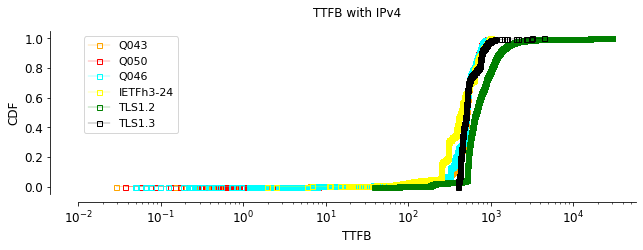

In [189]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q050
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q046
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'cyan')
#Q098
#plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')
#IETF h3-24
plt.plot(x6.xs, x6.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'yellow')
#TLS1.2
plt.plot(x2.xs, x2.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#TLS1.3
plt.plot(x4.xs, x4.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'black')


ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
#ax.set_ylim([0,1.05])
ax.set_xlim([0.01,58000])
ax.set_xscale('log')
ax.set_xlabel('TTFB', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q050', 'Q046', 'IETFh3-24', 'TLS1.2', 'TLS1.3'], fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
##ax3.set_ylabel('[\'11th Oct - \'11th Nov')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TTFB with IPv4', fontsize=12, y=1.05)
plt.savefig('./AWS/Bahrain/TTFB_ipv4.png', format='png', bbox_inches='tight')

In [190]:
x = Cdf.MakeCdfFromList(quic43['TotalDownloadTime'].values)
x1 =Cdf.MakeCdfFromList(quic50['TotalDownloadTime'].values)
x3 = Cdf.MakeCdfFromList(quic46['TotalDownloadTime'].values)
#x5 = Cdf.MakeCdfFromList(quic98['TotalDownloadTime'].values)
x6 = Cdf.MakeCdfFromList(quicID24['TotalDownloadTime'].values)
x4 = Cdf.MakeCdfFromList(tcp13['TotalDownloadTime'].values)
x2 =Cdf.MakeCdfFromList(tcp12['TotalDownloadTime'].values)

In [191]:
write_percentiles('Q050.csv', x1)
write_percentiles('tcp12.csv', x2)
write_percentiles('Q046.csv', x3)
write_percentiles('tcp13.csv', x4)
#write_percentiles('Q098.csv', x5)
write_percentiles('IETFh3-24.csv', x6)
write_percentiles('Q043.csv', x)

In [192]:
print_percentiles(x1, 'Q050')
print_percentiles(x2, 'tcp12')
print_percentiles(x3, 'Q046')
print_percentiles(x4, 'tcp13')
#print_percentiles(x5, 'Q098')
print_percentiles(x6, 'IETFh3-24')
print_percentiles(x, 'Q043')

-----------------------------

percentile values distribution for Q050

20th Percentile:392.133000

25th Percentile:429.186000

40th Percentile:491.833000

50th Percentile:506.198000

60th Percentile:523.919000

75th Percentile:606.995000

80th Percentile:660.212000

90th Percentile:760.267000

99th Percentile:954.137000

-----------------------------

-----------------------------

percentile values distribution for tcp12

20th Percentile:537.757000

25th Percentile:554.100000

40th Percentile:648.248000

50th Percentile:743.374000

60th Percentile:852.257000

75th Percentile:1064.146000

80th Percentile:1137.490000

90th Percentile:1456.414000

99th Percentile:3442.498000

-----------------------------

-----------------------------

percentile values distribution for Q046

20th Percentile:391.893000

25th Percentile:428.605000

40th Percentile:491.964000

50th Percentile:506.243000

60th Percentile:524.493000

75th Percentile:610.810000

80th Percentile:661.821000

90th Percentile:7

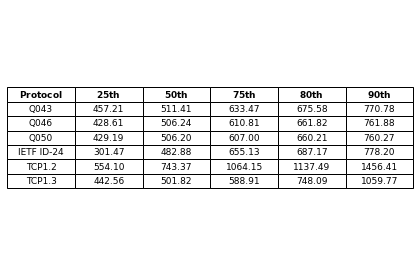

In [193]:
data = {'$\\bf{Protocol}$': ['Q043', 'Q046', 'Q050', 'IETF ID-24', 'TCP1.2', 'TCP1.3'],
	'$\\bf{25th}$': ["{:.2f}".format(x.Percentile(25)), "{:.2f}".format(x3.Percentile(25)), "{:.2f}".format(x1.Percentile(25)), "{:.2f}".format(x6.Percentile(25)), "{:.2f}".format(x2.Percentile(25)), "{:.2f}".format(x4.Percentile(25))],
	'$\\bf{50th}$': ["{:.2f}".format(x.Percentile(50)), "{:.2f}".format(x3.Percentile(50)), "{:.2f}".format(x1.Percentile(50)), "{:.2f}".format(x6.Percentile(50)), "{:.2f}".format(x2.Percentile(50)), "{:.2f}".format(x4.Percentile(50))],
	'$\\bf{75th}$': ["{:.2f}".format(x.Percentile(75)), "{:.2f}".format(x3.Percentile(75)), "{:.2f}".format(x1.Percentile(75)), "{:.2f}".format(x6.Percentile(75)), "{:.2f}".format(x2.Percentile(75)), "{:.2f}".format(x4.Percentile(75))],
	'$\\bf{80th}$': ["{:.2f}".format(x.Percentile(80)), "{:.2f}".format(x3.Percentile(80)), "{:.2f}".format(x1.Percentile(80)), "{:.2f}".format(x6.Percentile(80)), "{:.2f}".format(x2.Percentile(80)), "{:.2f}".format(x4.Percentile(80))],
    '$\\bf{90th}$': ["{:.2f}".format(x.Percentile(90)), "{:.2f}".format(x3.Percentile(90)), "{:.2f}".format(x1.Percentile(90)), "{:.2f}".format(x6.Percentile(90)), "{:.2f}".format(x2.Percentile(90)), "{:.2f}".format(x4.Percentile(90))]
        }    

df_percentile = pd.DataFrame(data)

fig, ax = plt.subplots()

# hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

ax.table(cellText=df_percentile.values, colLabels=df_percentile.columns, loc='center', cellLoc='center')

fig.tight_layout()
plt.savefig('./AWS/Bahrain/TotalDownloadTime_ipv4_percentile.png', format='png', bbox_inches='tight')

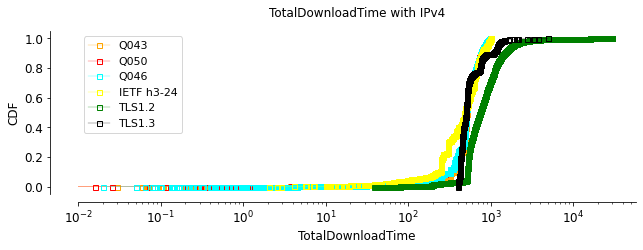

In [194]:
fig = plt.figure(figsize = (10,3))
plt.rcParams['font.size'] = 12
ax = plt.gca()
yticks = np.arange(0,1.1,0.2)

#Q043
plt.plot(x.xs, x.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'orange')
#Q050
plt.plot(x1.xs, x1.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'red')
#Q046
plt.plot(x3.xs, x3.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'cyan')
#Q098
#plt.plot(x5.xs, x5.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'blue')
#IETF h3-24
plt.plot(x6.xs, x6.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'yellow')
#TLS1.2
plt.plot(x2.xs, x2.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'green')
#TLS1.3
plt.plot(x4.xs, x4.ps, marker='s', linewidth=0.3, markersize=5, fillstyle='none', color = 'black')


ax = fig.axes[0]
ax.grid(False)
ax.set_yticks(yticks)
#ax.set_ylim([0,1.05])
#ax.set_xlim([20,1000])
ax.set_xlim([0.01,58000])
ax.set_xscale('log')
ax.set_xlabel('TotalDownloadTime', fontsize=12)
ax.set_ylabel('CDF', fontsize=12)

plt.legend(['Q043', 'Q050', 'Q046', 'IETF h3-24', 'TLS1.2', 'TLS1.3'], fontsize=11, loc='best')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.spines['left'].set_position(('axes', -0.05))

ax3 = ax.twinx()
ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.spines['left'].set_color('none')
ax3.spines['bottom'].set_color('none')
ax3.yaxis.set_ticks_position('none')
##ax3.set_ylabel('[\'11th Oct - \'11th Nov')
plt.setp(ax3.get_yticklabels(), visible=False)

plt.title('TotalDownloadTime with IPv4', fontsize=12, y=1.05)
plt.savefig('./AWS/Bahrain/TotalDownloadTime_ipv4.png', format='png', bbox_inches='tight')